In [128]:
%matplotlib inline
import matplotlib.pyplot  as plt
import pandas as pd
import numpy as np


In [129]:
heart_disease = pd.read_csv("data/heart-disease.csv")

In [130]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [131]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [135]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
y_preds = clf.predict(X_test)

In [137]:
clf.score(X_train, y_train)

1.0

In [138]:
clf.score(X_test, y_test)

0.8026315789473685

In [139]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

In [140]:
models = {"LinearSVC": LinearSVC(),
          "SVC": SVC(),
          "KNN": KNeighborsClassifier(),
          "LinearRegression": LinearRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

results = {}

In [141]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

{'LinearSVC': 0.7631578947368421,
 'SVC': 0.7236842105263158,
 'KNN': 0.6973684210526315,
 'LinearRegression': 0.21184227139402534,
 'RandomForestClassifier': 0.7894736842105263}

In [142]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)

results

{'LinearSVC': 0.868421052631579,
 'SVC': 0.7763157894736842,
 'KNN': 0.631578947368421,
 'LinearRegression': 0.5425680891403275,
 'RandomForestClassifier': 0.8421052631578947}

<Axes: >

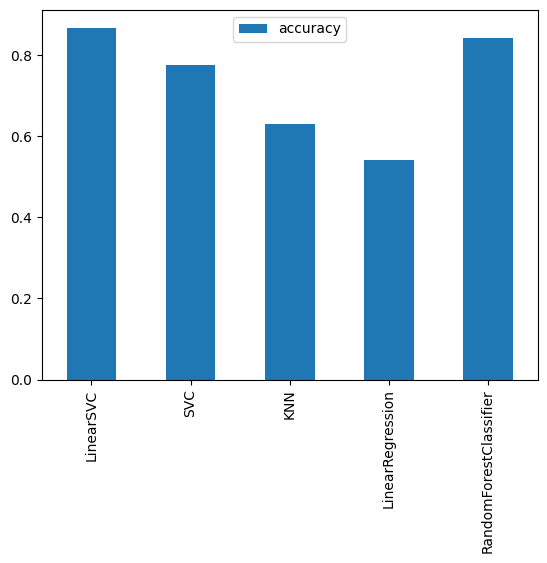

In [143]:
results_df = pd.DataFrame(results.values(),
                          results.keys(),
                          columns=["accuracy"])

results_df.plot.bar()

In [144]:
results_df

,accuracy
LinearSVC,0.868421
SVC,0.776316
KNN,0.631579
LinearRegression,0.542568
RandomForestClassifier,0.842105


In [145]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [146]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(estimator=LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=5,
                                verbose=1)


rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=1)

In [147]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(1438.44988828766)}

In [148]:
rs_log_reg.best_score_

np.float64(0.8323671497584542)

In [149]:
clf = LogisticRegression(**rs_log_reg.best_params_)
clf.fit(X_train, y_train)

LogisticRegression(C=np.float64(1438.44988828766), solver='liblinear')

In [150]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, RocCurveDisplay

In [151]:
y_preds = clf.predict(X_test)

In [152]:
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 2, 45]])

In [153]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        29
           1       0.88      0.96      0.92        47

    accuracy                           0.89        76
   macro avg       0.90      0.88      0.89        76
weighted avg       0.90      0.89      0.89        76



In [154]:
from sklearn.model_selection import cross_val_score

In [155]:
cross_val_score(clf,
                X,
                y,
                scoring="accuracy",
                cv=5)

array([0.80327869, 0.8852459 , 0.83606557, 0.86666667, 0.76666667])

In [156]:
cross_val_acc = np.mean(cross_val_score(clf,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))
cross_val_acc

np.float64(0.831584699453552)

In [158]:
cross_val_precision = np.mean(cross_val_score(clf,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))

cross_val_precision

np.float64(0.8239892427392427)

In [160]:
cross_val_recall = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

np.float64(0.8848484848484848)

In [161]:
from joblib import load, dump

In [162]:
dump(clf, " practice.joblib")

[' practice.joblib']

In [166]:
loaded_model = load(" practice.joblib")
score = clf.score(X_test, y_test)
print(f"Model score:{score}")
print(f"Loaded Model Score: {loaded_model.score(X_test, y_test)}")

Model score:0.8947368421052632
Loaded Model Score: 0.8947368421052632
